In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns



#================================================================================================================ 
#Get Columns from Signal Data CSV file
#================================================================================================================

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])
#print (df_spat)

eventid = df_spat['EventId']
parameter = df_spat['Parameter']

print(df_spat)

print(df_spat.info())


#format of dictionary

#lanes = { lane_num: 
# {
#    event_id: (timestamps of that event)

#}
#}

lanes = dict()

print(df_spat.iloc[0]['Parameter'])

for i in range (len(df_spat)):
    lane_num = df_spat.iloc[i]['Parameter']
    time = df_spat.iloc[i]['TimeStamp']
    event_id = df_spat.iloc[i]['EventId']
    
    if lane_num not in lanes:
        lanes[lane_num] = dict()
    if event_id not in lanes[lane_num]:
        lanes[lane_num][event_id]= []

    lanes[lane_num][event_id].append(time)
    
#print(lanes[0][0][0])


                 TimeStamp  DeviceId  EventId  Parameter
0      2021-01-04 07:00:05       613        2          2
1      2021-01-04 07:00:05       613        2          6
2      2021-01-04 07:00:05       613        2          7
3      2021-01-04 07:00:05       613       44          3
4      2021-01-04 07:00:05       613       44          8
...                    ...       ...      ...        ...
122146 2021-01-05 06:59:43       613       48          5
122147 2021-01-05 06:59:50       613       48          4
122148 2021-01-05 06:59:50       613       48          8
122149 2021-01-05 06:59:53       613        3          4
122150 2021-01-05 06:59:53       613        3          8

[122151 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122151 entries, 0 to 122150
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TimeStamp  122151 non-null  datetime64[ns]
 1   DeviceId   122151 non-null  in

In [6]:
#print(lanes)

In [62]:


def laneTimeWasted(laneid):
    
    #total number of green light starts (eventid 1 = green light start)
    lane_event_total = len(lanes[laneid][1])
    print("Lane # {}\n".format(laneid))
   
    print("Total number of green lights = ")
    print(lane_event_total)

    total_green_time = pd.Timedelta(days=0)
    total_yellow_time = pd.Timedelta(days=0)
    total_red_time = pd.Timedelta(days=0)
    total_green_to_red_time = pd.Timedelta(days=0)
    
    total_time = lanes[laneid][1][len(lanes[laneid][1]) - 1] - lanes[laneid][1][0]

    #print(total_green_time)

    for i in range (lane_event_total):

        green_start_lane = lanes[laneid][1][i]     #eventid 1 = green_start
        green_end_lane = lanes[laneid][7][i]       # eventid 7 = green end
        yellow_start_lane = lanes[laneid][8][i]    #eventid 8 = yellow start
        yellow_end_lane = lanes[laneid][9][i]       #eventid 9 = yellow end
        red_start_lane = lanes[laneid][10][i]        #eventid 10 = red start
        red_end_lane = lanes[laneid][11][i]          #eventid 11 = red end  
    
                         
        green_time = green_end_lane - green_start_lane
        yellow_time = yellow_end_lane - yellow_start_lane
        red_time = red_end_lane - red_start_lane
        green_to_red = red_end_lane - green_start_lane
    
        total_green_time += green_time
        total_yellow_time += yellow_time
        total_red_time += red_time
        total_green_to_red_time += green_to_red
        total_stop_time = total_time - total_green_to_red_time
    
    print("\nTotal Time: ")
    print(total_time)
    print("\nTotal Green Time: ")
    print(total_green_time)
    print("\nTotal Yellow Time: ")
    print(total_yellow_time)
    print("\nTotal Red Time: ")
    print(total_red_time)
    print("\nTotal Go Time: ")
    print(total_green_to_red_time)
    print("\nTotal Stop Time")
    print(total_stop_time)
    
    return pd.Timedelta(total_stop_time)
                             

laneTimeWasted(2) 

Lane # 2

Total number of green lights = 
941

Total Time: 
0 days 23:58:17

Total Green Time: 
0 days 10:35:15

Total Yellow Time: 
0 days 01:02:44

Total Red Time: 
0 days 00:00:00

Total Go Time: 
0 days 11:37:59

Total Stop Time
0 days 12:20:18


Timedelta('0 days 12:20:18')

In [34]:
straight_lane_total_time = laneTimeWasted(2) + laneTimeWasted(4) + laneTimeWasted(6) + laneTimeWasted(8)

print("total straight lane wait time: ")
print(straight_lane_total_time)

left_turn_total_time = laneTimeWasted(1) + laneTimeWasted(3) + laneTimeWasted(5) + laneTimeWasted(7)

print("total left-turn wait time: ")
print(left_turn_total_time)


total straight lane wait time: 
4 days 08:09:18
total left-turn wait time: 
3 days 16:26:10


In [68]:
laneTimeWasted(1) 
laneTimeWasted(3) 

Lane # 1

Total number of green lights = 
453

Total Time: 
0 days 23:51:01

Total Green Time: 
0 days 01:10:01

Total Yellow Time: 
0 days 00:22:39

Total Red Time: 
0 days 00:15:06

Total Go Time: 
0 days 01:47:46

Total Stop Time
0 days 22:03:15
Lane # 3

Total number of green lights = 
430

Total Time: 
0 days 23:47:25

Total Green Time: 
0 days 00:53:49

Total Yellow Time: 
0 days 00:21:30

Total Red Time: 
0 days 00:22:16

Total Go Time: 
0 days 01:37:35

Total Stop Time
0 days 22:09:50


Timedelta('0 days 22:09:50')

In [67]:
laneTimeWasted(2) 
laneTimeWasted(6) 

Lane # 2

Total number of green lights = 
941

Total Time: 
0 days 23:58:17

Total Green Time: 
0 days 10:35:15

Total Yellow Time: 
0 days 01:02:44

Total Red Time: 
0 days 00:00:00

Total Go Time: 
0 days 11:37:59

Total Stop Time
0 days 12:20:18
Lane # 6

Total number of green lights = 
941

Total Time: 
0 days 23:58:17

Total Green Time: 
0 days 10:35:15

Total Yellow Time: 
0 days 01:02:44

Total Red Time: 
0 days 00:00:00

Total Go Time: 
0 days 11:37:59

Total Stop Time
0 days 12:20:18


Timedelta('0 days 12:20:18')

In [66]:
laneTimeWasted(5) 
laneTimeWasted(7) 



Lane # 5

Total number of green lights = 
453

Total Time: 
0 days 23:51:01

Total Green Time: 
0 days 01:10:01

Total Yellow Time: 
0 days 00:22:39

Total Red Time: 
0 days 00:15:06

Total Go Time: 
0 days 01:47:46

Total Stop Time
0 days 22:03:15
Lane # 7

Total number of green lights = 
430

Total Time: 
0 days 23:47:25

Total Green Time: 
0 days 00:53:49

Total Yellow Time: 
0 days 00:21:30

Total Red Time: 
0 days 00:22:16

Total Go Time: 
0 days 01:37:35

Total Stop Time
0 days 22:09:50


Timedelta('0 days 22:09:50')

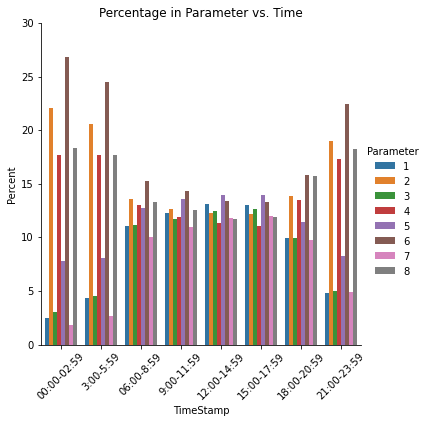

In [70]:
#Parameter vs time graph 

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

#bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

#labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
#         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat8 = df_spat

#indexNames = df_spat8[(df_spat8['Parameter'] == 9) | (df_spat8['Parameter'] == 10) | (df_spat8['Parameter'] == 11) | (df_spat8['Parameter'] == 12)  | (df_spat8['Parameter'] == 13) | (df_spat8['Parameter'] == 14) | (df_spat8['Parameter'] == 15) | (df_spat8['Parameter'] == 16)].index
indexNames = df_spat8[(df_spat8['Parameter'] > 8)].index

# Delete these row indexes from dataFrame
df_spat8.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'Parameter'

df_y = df_spat8.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
barchart.ax.set_ylim(0,30)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in Parameter vs. Time")

plt.show()

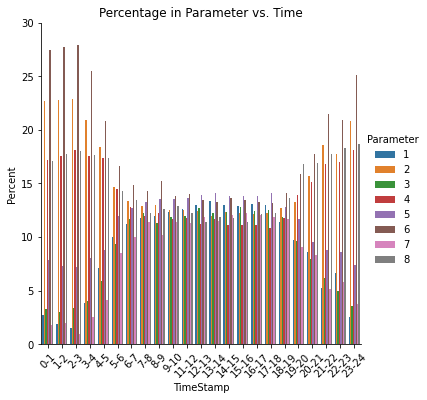

In [65]:
#Parameter vs time graph 

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

#labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat8 = df_spat

#indexNames = df_spat8[(df_spat8['Parameter'] == 9) | (df_spat8['Parameter'] == 10) | (df_spat8['Parameter'] == 11) | (df_spat8['Parameter'] == 12)  | (df_spat8['Parameter'] == 13) | (df_spat8['Parameter'] == 14) | (df_spat8['Parameter'] == 15) | (df_spat8['Parameter'] == 16)].index
indexNames = df_spat8[(df_spat8['Parameter'] > 8)].index

# Delete these row indexes from dataFrame
df_spat8.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'Parameter'

df_y = df_spat8.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
barchart.ax.set_ylim(0,30)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in Parameter vs. Time")

plt.show()

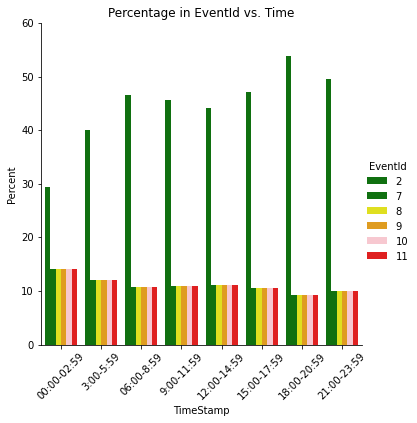

In [60]:
#EventID vs time graph 


col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat_ev = df_spat

indexNames = df_spat_ev[(df_spat_ev['EventId'] > 11) | (df_spat_ev['EventId'] == 1) | (df_spat_ev['EventId'] == 3) | (df_spat_ev['EventId'] == 4) | (df_spat_ev['EventId'] == 5) | (df_spat_ev['EventId'] == 6) | (df_spat_ev['EventId'] == 0)].index
# Delete these row indexes from dataFrame
df_spat_ev.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'EventId'

df_y = df_spat_ev.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y, palette=sns.color_palette(['green', 'green', 'yellow', 'orange', 'pink', 'red']))
barchart.ax.set_ylim(0,60)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in EventId vs. Time")

plt.show()


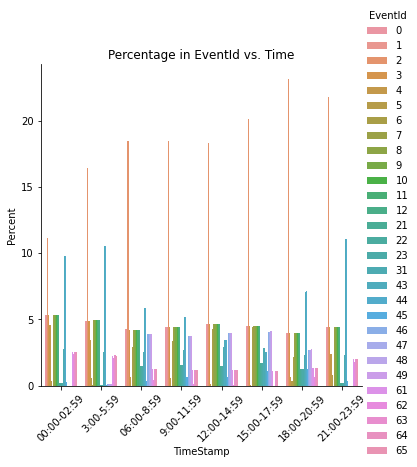

In [73]:
#EventID vs time graph 


col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat_ev = df_spat

#indexNames = df_spat_ev[(df_spat_ev['EventId'] > 11) | (df_spat_ev['EventId'] == 1) | (df_spat_ev['EventId'] == 3) | (df_spat_ev['EventId'] == 4) | (df_spat_ev['EventId'] == 5) | (df_spat_ev['EventId'] == 6) | (df_spat_ev['EventId'] == 0)].index
# Delete these row indexes from dataFrame
#df_spat_ev.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'EventId'

df_y = df_spat_ev.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in EventId vs. Time")

plt.show()


In [26]:
for i in range (len(df_spat)):
    if df_spat.iloc[i]['Parameter'] == 9:
        print(df_spat.iloc[i]['TimeStamp'])

2021-01-04 12:43:19
2021-01-04 12:43:19
2021-01-04 12:43:19
2021-01-04 12:43:19
2021-01-04 14:07:33
2021-01-04 14:07:33
2021-01-04 14:07:33
2021-01-04 14:07:33
2021-01-05 05:34:41
2021-01-05 05:34:41
2021-01-05 05:34:41
2021-01-05 05:34:41


In [98]:
#Time Wasted Per Interval 

def laneTimeWastedPerInterval(laneid, TimeStamp1, TimeStamp2):
    
    #total number of green light starts (eventid 1 = green light start)
    lane_event_total = len(lanes[laneid][1])
    #print("Lane # {}\n".format(laneid))
   
    #print("Total number of green lights = ")
    #print(lane_event_total)

    total_green_time = pd.Timedelta(days=0)
    total_yellow_time = pd.Timedelta(days=0)
    total_red_time = pd.Timedelta(days=0)
    total_green_to_red_time = pd.Timedelta(days=0)
    
    total_time = TimeStamp2 - TimeStamp1

    #print(total_green_time)

    for i in range (lane_event_total):
        
        

        green_start_lane = lanes[laneid][1][i]     #eventid 1 = green_start
        green_end_lane = lanes[laneid][7][i]       # eventid 7 = green end
        yellow_start_lane = lanes[laneid][8][i]    #eventid 8 = yellow start
        yellow_end_lane = lanes[laneid][9][i]       #eventid 9 = yellow end
        red_start_lane = lanes[laneid][10][i]        #eventid 10 = red start
        red_end_lane = lanes[laneid][11][i]          #eventid 11 = red end  
        
        if ((TimeStamp1 < green_start_lane < TimeStamp2) & (TimeStamp1 < green_end_lane < TimeStamp2)):
                         
            green_time = green_end_lane - green_start_lane
            #print(green_start_lane)
            #print("passed green time test")
            total_green_time += green_time
            green_to_red = red_end_lane - green_start_lane
            total_green_to_red_time += green_to_red
        
        if ((TimeStamp1 < yellow_start_lane < TimeStamp2) & (TimeStamp1 < yellow_end_lane < TimeStamp2)):
            
            yellow_time = yellow_end_lane - yellow_start_lane
            #print(yellow_start_lane)
            #print("passed yellow time test")
            total_yellow_time += yellow_time
        
        if ((TimeStamp1 < red_start_lane < TimeStamp2) & (TimeStamp1 < red_end_lane < TimeStamp2)):
            
            red_time = red_end_lane - red_start_lane
            #print(red_start_lane)
            #print("passed red time test")
            total_red_time += red_time
        
        
    
        
        
        
        
        total_stop_time = total_time - total_green_to_red_time
        
    return (total_stop_time)



#INTERVAL 
print("Over Interval: ")
start_datetime_object = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
print(start_datetime_object)
print(" to ")

end_datetime_object = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
print(end_datetime_object)

print("\n\nTotal_Wait_time = ")
laneTimeWastedPerInterval(2, start_datetime_object, end_datetime_object)

Over Interval: 
2021-01-04 07:00:00
 to 
2021-01-04 13:00:00


Total_Wait_time = 


Timedelta('0 days 03:41:23')

In [115]:
#Interval of Time Wasted per hour
datetime_7AM = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
datetime_8AM = datetime.strptime('Jan 4 2021  8:00AM', '%b %d %Y %I:%M%p')
datetime_9AM = datetime.strptime('Jan 4 2021  9:00AM', '%b %d %Y %I:%M%p')
datetime_10AM = datetime.strptime('Jan 4 2021  10:00AM', '%b %d %Y %I:%M%p')
datetime_11AM = datetime.strptime('Jan 4 2021  11:00AM', '%b %d %Y %I:%M%p')
datetime_12PM = datetime.strptime('Jan 4 2021  12:00PM', '%b %d %Y %I:%M%p')
datetime_1PM = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
datetime_2PM = datetime.strptime('Jan 4 2021  2:00PM', '%b %d %Y %I:%M%p')
datetime_3PM = datetime.strptime('Jan 4 2021  3:00PM', '%b %d %Y %I:%M%p')
datetime_4PM = datetime.strptime('Jan 4 2021  4:00PM', '%b %d %Y %I:%M%p')
datetime_5PM = datetime.strptime('Jan 4 2021  5:00PM', '%b %d %Y %I:%M%p')
datetime_6PM = datetime.strptime('Jan 4 2021  6:00PM', '%b %d %Y %I:%M%p')
datetime_7PM = datetime.strptime('Jan 4 2021  7:00PM', '%b %d %Y %I:%M%p')
datetime_8PM = datetime.strptime('Jan 4 2021  8:00PM', '%b %d %Y %I:%M%p')
datetime_9PM = datetime.strptime('Jan 4 2021  9:00PM', '%b %d %Y %I:%M%p')
datetime_10PM = datetime.strptime('Jan 4 2021  10:00PM', '%b %d %Y %I:%M%p')
datetime_11PM = datetime.strptime('Jan 4 2021  11:00PM', '%b %d %Y %I:%M%p')
datetime_12AM = datetime.strptime('Jan 5 2021  12:00AM', '%b %d %Y %I:%M%p')
datetime_1AM = datetime.strptime('Jan 5 2021  1:00AM', '%b %d %Y %I:%M%p')
datetime_2AM = datetime.strptime('Jan 5 2021  2:00AM', '%b %d %Y %I:%M%p')
datetime_3AM = datetime.strptime('Jan 5 2021  3:00AM', '%b %d %Y %I:%M%p')
datetime_4AM = datetime.strptime('Jan 5 2021  4:00AM', '%b %d %Y %I:%M%p')
datetime_5AM = datetime.strptime('Jan 5 2021  5:00AM', '%b %d %Y %I:%M%p')
datetime_6AM = datetime.strptime('Jan 5 2021  6:00AM', '%b %d %Y %I:%M%p')
datetime_7AM_1 = datetime.strptime('Jan 5 2021  7:00AM', '%b %d %Y %I:%M%p')


df_results = pd.DataFrame(columns=['Signal_Num', 'Time_Interval', 'Wait_Time'])

#print("\n\nTotal_Wait_time 0-1 = ")
w = laneTimeWastedPerInterval(2, datetime_12AM, datetime_1AM)
df0 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['0:00-1:00'], 'Wait_Time': [w]})
df_results = df_results.append(df0, ignore_index = True)


#print("\n\nTotal_Wait_time 1-2 = ")
w = laneTimeWastedPerInterval(2, datetime_1AM, datetime_2AM)
df1 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['1:00-2:00'], 'Wait_Time': [w]})
df_results = df_results.append(df1, ignore_index = True)


#print("\n\nTotal_Wait_time 2-3 = ")
w = laneTimeWastedPerInterval(2, datetime_2AM, datetime_3AM)
df2 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['2:00-3:00'], 'Wait_Time': [w]})
df_results = df_results.append(df2, ignore_index = True)


#print("\n\nTotal_Wait_time 3-4 = ")
w = laneTimeWastedPerInterval(2, datetime_3AM, datetime_4AM)
df3 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['3:00-4:00'], 'Wait_Time': [w]})
df_results = df_results.append(df3, ignore_index = True)


#print("\n\nTotal_Wait_time 4-5 = ")
w = laneTimeWastedPerInterval(2, datetime_4AM, datetime_5AM)
df4 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['4:00-5:00'], 'Wait_Time': [w]})
df_results = df_results.append(df4, ignore_index = True)


#print("\n\nTotal_Wait_time 5-6 = ")
w = laneTimeWastedPerInterval(2, datetime_5AM, datetime_6AM)
df5 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['5:00-6:00'], 'Wait_Time': [w]})
df_results = df_results.append(df5, ignore_index = True)


#print("\n\nTotal_Wait_time 6-7 = ")
w =laneTimeWastedPerInterval(2, datetime_6AM, datetime_7AM_1)
df6 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['6:00-7:00'], 'Wait_Time': [w]})
df_results = df_results.append(df6, ignore_index = True)

      
#print("\n\nTotal_Wait_time 7-8 = ")
w = laneTimeWastedPerInterval(2, datetime_7AM, datetime_8AM)
df7 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['7:00-8:00'], 'Wait_Time': [w]})
df_results = df_results.append(df7, ignore_index = True)

      
#print("\n\nTotal_Wait_time 8-9 = ")
w = laneTimeWastedPerInterval(2, datetime_8AM, datetime_9AM)
df8 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['8:00-9:00'], 'Wait_Time': [w]})
df_results = df_results.append(df8, ignore_index = True)


#print("\n\nTotal_Wait_time 9-10 = ")
w = laneTimeWastedPerInterval(2, datetime_9AM, datetime_10AM)
df9 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['9:00-10:00'], 'Wait_Time': [w]})
df_results = df_results.append(df9, ignore_index = True)


#print("\n\nTotal_Wait_time 10-11 = ")
w = laneTimeWastedPerInterval(2, datetime_10AM, datetime_11AM)
df10 = pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['10:00-11:00'], 'Wait_Time': [w]})
df_results = df_results.append(df10, ignore_index = True)


#print("\n\nTotal_Wait_time 11-12 = ")
w = laneTimeWastedPerInterval(2, datetime_11AM, datetime_12PM)
df11= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['11:00-12:00'], 'Wait_Time': [w]})
df_results = df_results.append(df11, ignore_index = True)


#print("\n\nTotal_Wait_time 12-13 = ")
w = laneTimeWastedPerInterval(2, datetime_12PM, datetime_1PM)
df12= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['12:00-13:00'], 'Wait_Time': [w]})
df_results = df_results.append(df12, ignore_index = True)


#print("\n\nTotal_Wait_time 13-14 = ")
w = laneTimeWastedPerInterval(2, datetime_1PM, datetime_2PM)
df13= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['13:00-14:00'], 'Wait_Time': [w]})
df_results = df_results.append(df13, ignore_index = True)


#print("\n\nTotal_Wait_time 14-15 = ")
w = laneTimeWastedPerInterval(2, datetime_2PM, datetime_3PM)
df14= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['14:00-15:00'], 'Wait_Time': [w]})
df_results = df_results.append(df14, ignore_index = True)


#print("\n\nTotal_Wait_time 15-16 = ")
w = laneTimeWastedPerInterval(2, datetime_3PM, datetime_4PM)
df15= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['15:00-16:00'], 'Wait_Time': [w]})
df_results = df_results.append(df15, ignore_index = True)


#print("\n\nTotal_Wait_time 16-17 = ")
w = laneTimeWastedPerInterval(2, datetime_4PM, datetime_5PM)
df16= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['16:00-17:00'], 'Wait_Time': [w]})
df_results = df_results.append(df16, ignore_index = True)


#print("\n\nTotal_Wait_time 17-18 = ")
w = laneTimeWastedPerInterval(2, datetime_5PM, datetime_6PM)
df17= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['17:00-18:00'], 'Wait_Time': [w]})
df_results = df_results.append(df17, ignore_index = True)
#print(df_results)

#print("\n\nTotal_Wait_time 18-19 = ")
w = laneTimeWastedPerInterval(2, datetime_6PM, datetime_7PM)
df18= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['18:00-19:00'], 'Wait_Time': [w]})
df_results = df_results.append(df18, ignore_index = True)


#print("\n\nTotal_Wait_time 19-20 = ")
w = laneTimeWastedPerInterval(2, datetime_7PM, datetime_8PM)
df19= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['19:00-20:00'], 'Wait_Time': [w]})
df_results = df_results.append(df19, ignore_index = True)


#print("\n\nTotal_Wait_time 20-21 = ")
w = laneTimeWastedPerInterval(2, datetime_8PM, datetime_9PM)
df20= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['20:00-21:00'], 'Wait_Time': [w]})
df_results = df_results.append(df20, ignore_index = True)


#print("\n\nTotal_Wait_time 21-22 = ")
w = laneTimeWastedPerInterval(2, datetime_9PM, datetime_10PM)
df21= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['21:00-22:00'], 'Wait_Time': [w]})
df_results = df_results.append(df21, ignore_index = True)


#print("\n\nTotal_Wait_time 22-23 = ")
w = laneTimeWastedPerInterval(2, datetime_10PM, datetime_11PM)
df22= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['22:00-23:00'], 'Wait_Time': [w]})
df_results = df_results.append(df22, ignore_index = True)


#print("\n\nTotal_Wait_time 23-24 = ")
w = laneTimeWastedPerInterval(2, datetime_11PM, datetime_12AM)
df23= pd.DataFrame({'Signal_Num' : [2], 'Time_Interval': ['23:00-24:00'], 'Wait_Time': [w]})
df_results = df_results.append(df23, ignore_index = True)


print(df_results)




   Signal_Num Time_Interval       Wait_Time
0           2     0:00-1:00 0 days 00:28:40
1           2     1:00-2:00 0 days 00:19:20
2           2     2:00-3:00 0 days 00:17:00
3           2     3:00-4:00 0 days 00:19:23
4           2     4:00-5:00 0 days 00:22:47
5           2     5:00-6:00 0 days 00:25:31
6           2     6:00-7:00 0 days 00:27:57
7           2     7:00-8:00 0 days 00:33:41
8           2     8:00-9:00 0 days 00:35:56
9           2    9:00-10:00 0 days 00:34:04
10          2   10:00-11:00 0 days 00:36:14
11          2   11:00-12:00 0 days 00:36:55
12          2   12:00-13:00 0 days 00:45:56
13          2   13:00-14:00 0 days 00:37:26
14          2   14:00-15:00 0 days 00:37:53
15          2   15:00-16:00 0 days 00:38:12
16          2   16:00-17:00 0 days 00:38:13
17          2   17:00-18:00 0 days 00:38:07
18          2   18:00-19:00 0 days 00:36:19
19          2   19:00-20:00 0 days 00:29:41
20          2   20:00-21:00 0 days 00:29:18
21          2   21:00-22:00 0 da

In [119]:
def TimeWastedperHour():
    
    df_results = pd.DataFrame(columns=['Signal_Num', 'Time_Interval', 'Wait_Time'])

    for i in range (1,9):

            #Interval of Time Wasted per hour
        datetime_7AM = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
        datetime_8AM = datetime.strptime('Jan 4 2021  8:00AM', '%b %d %Y %I:%M%p')
        datetime_9AM = datetime.strptime('Jan 4 2021  9:00AM', '%b %d %Y %I:%M%p')
        datetime_10AM = datetime.strptime('Jan 4 2021  10:00AM', '%b %d %Y %I:%M%p')
        datetime_11AM = datetime.strptime('Jan 4 2021  11:00AM', '%b %d %Y %I:%M%p')
        datetime_12PM = datetime.strptime('Jan 4 2021  12:00PM', '%b %d %Y %I:%M%p')
        datetime_1PM = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
        datetime_2PM = datetime.strptime('Jan 4 2021  2:00PM', '%b %d %Y %I:%M%p')
        datetime_3PM = datetime.strptime('Jan 4 2021  3:00PM', '%b %d %Y %I:%M%p')
        datetime_4PM = datetime.strptime('Jan 4 2021  4:00PM', '%b %d %Y %I:%M%p')
        datetime_5PM = datetime.strptime('Jan 4 2021  5:00PM', '%b %d %Y %I:%M%p')
        datetime_6PM = datetime.strptime('Jan 4 2021  6:00PM', '%b %d %Y %I:%M%p')
        datetime_7PM = datetime.strptime('Jan 4 2021  7:00PM', '%b %d %Y %I:%M%p')
        datetime_8PM = datetime.strptime('Jan 4 2021  8:00PM', '%b %d %Y %I:%M%p')
        datetime_9PM = datetime.strptime('Jan 4 2021  9:00PM', '%b %d %Y %I:%M%p')
        datetime_10PM = datetime.strptime('Jan 4 2021  10:00PM', '%b %d %Y %I:%M%p')
        datetime_11PM = datetime.strptime('Jan 4 2021  11:00PM', '%b %d %Y %I:%M%p')
        datetime_12AM = datetime.strptime('Jan 5 2021  12:00AM', '%b %d %Y %I:%M%p')
        datetime_1AM = datetime.strptime('Jan 5 2021  1:00AM', '%b %d %Y %I:%M%p')
        datetime_2AM = datetime.strptime('Jan 5 2021  2:00AM', '%b %d %Y %I:%M%p')
        datetime_3AM = datetime.strptime('Jan 5 2021  3:00AM', '%b %d %Y %I:%M%p')
        datetime_4AM = datetime.strptime('Jan 5 2021  4:00AM', '%b %d %Y %I:%M%p')
        datetime_5AM = datetime.strptime('Jan 5 2021  5:00AM', '%b %d %Y %I:%M%p')
        datetime_6AM = datetime.strptime('Jan 5 2021  6:00AM', '%b %d %Y %I:%M%p')
        datetime_7AM_1 = datetime.strptime('Jan 5 2021  7:00AM', '%b %d %Y %I:%M%p')


        

        #print("\n\nTotal_Wait_time 0-1 = ")
        w = laneTimeWastedPerInterval(i, datetime_12AM, datetime_1AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df0 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['0:00-1:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df0, ignore_index = True)


        #print("\n\nTotal_Wait_time 1-2 = ")
        w = laneTimeWastedPerInterval(i, datetime_1AM, datetime_2AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df1 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['1:00-2:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df1, ignore_index = True)


        #print("\n\nTotal_Wait_time 2-3 = ")
        w = laneTimeWastedPerInterval(i, datetime_2AM, datetime_3AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df2 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['2:00-3:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df2, ignore_index = True)


        #print("\n\nTotal_Wait_time 3-4 = ")
        w = laneTimeWastedPerInterval(i, datetime_3AM, datetime_4AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df3 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['3:00-4:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df3, ignore_index = True)


        #print("\n\nTotal_Wait_time 4-5 = ")
        w = laneTimeWastedPerInterval(i, datetime_4AM, datetime_5AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df4 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['4:00-5:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df4, ignore_index = True)


        #print("\n\nTotal_Wait_time 5-6 = ")
        w = laneTimeWastedPerInterval(i, datetime_5AM, datetime_6AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df5 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['5:00-6:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df5, ignore_index = True)


        #print("\n\nTotal_Wait_time 6-7 = ")
        w =laneTimeWastedPerInterval(i, datetime_6AM, datetime_7AM_1)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df6 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['6:00-7:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df6, ignore_index = True)


        #print("\n\nTotal_Wait_time 7-8 = ")
        w = laneTimeWastedPerInterval(i, datetime_7AM, datetime_8AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df7 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['7:00-8:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df7, ignore_index = True)


        #print("\n\nTotal_Wait_time 8-9 = ")
        w = laneTimeWastedPerInterval(i, datetime_8AM, datetime_9AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df8 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['8:00-9:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df8, ignore_index = True)


        #print("\n\nTotal_Wait_time 9-10 = ")
        w = laneTimeWastedPerInterval(i, datetime_9AM, datetime_10AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df9 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['9:00-10:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df9, ignore_index = True)


        #print("\n\nTotal_Wait_time 10-11 = ")
        w = laneTimeWastedPerInterval(i, datetime_10AM, datetime_11AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df10 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['10:00-11:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df10, ignore_index = True)


        #print("\n\nTotal_Wait_time 11-12 = ")
        w = laneTimeWastedPerInterval(i, datetime_11AM, datetime_12PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df11= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['11:00-12:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df11, ignore_index = True)


        #print("\n\nTotal_Wait_time 12-13 = ")
        w = laneTimeWastedPerInterval(i, datetime_12PM, datetime_1PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df12= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['12:00-13:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df12, ignore_index = True)


        #print("\n\nTotal_Wait_time 13-14 = ")
        w = laneTimeWastedPerInterval(i, datetime_1PM, datetime_2PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df13= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['13:00-14:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df13, ignore_index = True)


        #print("\n\nTotal_Wait_time 14-15 = ")
        w = laneTimeWastedPerInterval(i, datetime_2PM, datetime_3PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df14= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['14:00-15:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df14, ignore_index = True)


        #print("\n\nTotal_Wait_time 15-16 = ")
        w = laneTimeWastedPerInterval(i, datetime_3PM, datetime_4PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df15= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['15:00-16:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df15, ignore_index = True)


        #print("\n\nTotal_Wait_time 16-17 = ")
        w = laneTimeWastedPerInterval(i, datetime_4PM, datetime_5PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df16= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['16:00-17:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df16, ignore_index = True)


        #print("\n\nTotal_Wait_time 17-18 = ")
        w = laneTimeWastedPerInterval(i, datetime_5PM, datetime_6PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df17= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['17:00-18:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df17, ignore_index = True)
        #print(df_results)

        #print("\n\nTotal_Wait_time 18-19 = ")
        w = laneTimeWastedPerInterval(i, datetime_6PM, datetime_7PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df18= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['18:00-19:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df18, ignore_index = True)


        #print("\n\nTotal_Wait_time 19-20 = ")
        w = laneTimeWastedPerInterval(i, datetime_7PM, datetime_8PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df19= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['19:00-20:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df19, ignore_index = True)


        #print("\n\nTotal_Wait_time 20-21 = ")
        w = laneTimeWastedPerInterval(i, datetime_8PM, datetime_9PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df20= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['20:00-21:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df20, ignore_index = True)


        #print("\n\nTotal_Wait_time 21-22 = ")
        w = laneTimeWastedPerInterval(i, datetime_9PM, datetime_10PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df21= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['21:00-22:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df21, ignore_index = True)


        #print("\n\nTotal_Wait_time 22-23 = ")
        w = laneTimeWastedPerInterval(i, datetime_10PM, datetime_11PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df22= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['22:00-23:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df22, ignore_index = True)


        #print("\n\nTotal_Wait_time 23-24 = ")
        w = laneTimeWastedPerInterval(i, datetime_11PM, datetime_12AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df23= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['23:00-24:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df23, ignore_index = True)


        print(df_results)

    filename = "time_wasted_per_signal_per_hour.csv"

    df_results.to_csv(filename, encoding = 'utf-8')
    

TimeWastedperHour()

   Signal_Num Time_Interval       Wait_Time
0           1     0:00-1:00 0 days 00:59:03
1           1     1:00-2:00 0 days 00:59:19
2           1     2:00-3:00 0 days 00:59:36
3           1     3:00-4:00 0 days 00:59:43
4           1     4:00-5:00 0 days 00:59:23
5           1     5:00-6:00 0 days 00:58:43
6           1     6:00-7:00 0 days 00:56:54
7           1     7:00-8:00 0 days 00:54:12
8           1     8:00-9:00 0 days 00:52:41
9           1    9:00-10:00 0 days 00:53:22
10          1   10:00-11:00 0 days 00:52:36
11          1   11:00-12:00 0 days 00:52:11
12          1   12:00-13:00 0 days 00:51:14
13          1   13:00-14:00 0 days 00:51:33
14          1   14:00-15:00 0 days 00:51:17
15          1   15:00-16:00 0 days 00:50:58
16          1   16:00-17:00 0 days 00:51:14
17          1   17:00-18:00 0 days 00:51:22
18          1   18:00-19:00 0 days 00:53:05
19          1   19:00-20:00 0 days 00:57:29
20          1   20:00-21:00 0 days 00:59:02
21          1   21:00-22:00 0 da